In [235]:
import pandas as pd
import dill
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import networkx as nx
import scipy.stats as sps
import plotly
import plotly.graph_objs as go


from sklearn.preprocessing import MinMaxScaler

In [2]:
RESULTS_DIR = '/Users/hailey/repos/convex_wi23/results/'
assert os.path.exists(RESULTS_DIR)

In [3]:
FIG_DIR = '/Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/'
assert os.path.exists(FIG_DIR)

In [4]:
basic_results_file = 'results_basic.pkl'
generated_results_file = 'results_generated_all_def.pkl'
with open(os.path.join(RESULTS_DIR, basic_results_file), 'rb') as infile:
    results_basic = dill.load(infile)
with open(os.path.join(RESULTS_DIR, generated_results_file), 'rb') as infile:
    results_gen = dill.load(infile)


In [5]:
df_basic = pd.DataFrame(data=results_basic)
df_generated = pd.DataFrame(data=results_gen)
df_basic[['b1', 'b2', 'b3', 'b4', 'b5']] = pd.DataFrame(df_basic.b.tolist(), index= df_basic.index)
df_basic[['x1', 'x2', 'x3']] = pd.DataFrame(df_basic.x.tolist(), index= df_basic.index)
df_generated[['b1', 'b2', 'b3', 'b4', 'b5']] = pd.DataFrame(df_generated.b.tolist(), index= df_generated.index)
df_generated[['x1', 'x2', 'x3']] = pd.DataFrame(df_generated.x.tolist(), index= df_generated.index)

In [86]:
len(df_generated)

184800

In [106]:
df_generated

is_infeasible  objective_val                      x  \
0               False          360.0   [130.0, 75.0, 155.0]   
1               False          360.0   [130.0, 75.0, 155.0]   
2               False          360.0   [130.0, 75.0, 155.0]   
3               False          360.0   [130.0, 75.0, 155.0]   
4               False          360.0   [130.0, 75.0, 155.0]   
...               ...            ...                    ...   
184795          False          438.0  [175.0, 140.0, 123.0]   
184796          False          439.0  [175.0, 140.0, 124.0]   
184797          False          439.0  [175.0, 140.0, 124.0]   
184798          False          440.0  [175.0, 140.0, 125.0]   
184799          False          441.0  [175.0, 140.0, 126.0]   

                                    b   attacker      defender   b1   b2   b3  \
0         [162, 107, 187, 5000, 8000]  generated  flutter-mane  162  107  187   
1         [162, 107, 187, 5000, 8100]  generated  flutter-mane  162  107  187   
2         [162, 107, 187, 5000, 8200]  generated  flutter-mane  162  107  187   
3         [162, 107, 187, 5000, 8300]  generated  flutter-mane  162  107  187   
4         [162, 107, 187, 5000, 8400]  generated  flutter-mane  162  107  187   
...                               ...        ...           ...  ...  ...  ...   
184795  [207, 172, 137, 15900, 21500]  generated     kingambit  207  172  137   
184796  [207, 172, 137, 15900, 21600]  generated     kingambit  207  172  137   
184797  [207, 172, 137, 15900, 21700]  generated     kingambit  207  172  137   
184798  [207, 172, 137, 15900, 21800]  generated     kingambit  207  172  137   
184799  [207, 172, 137, 15900, 21900]  generated     kingambit  207  172  137   

           b4     b5     x1     x2     x3  
0        5000   8000  130.0   75.0  155.0  
1        5000   8100  130.0   75.0  155.0  
2        5000   8200  130.0   75.0  155.0  
3        5000   8300  130.0   75.0  155.0  
4        5000   8400  130.0   75.0  155.0  
...       ...    ...    ...    ...    ...  
184795  15900  21500  175.0  140.0  123.0  
184796  15900  21600  175.0  140.0  124.0  
184797  15900  21700  175.0  140.0  124.0  
184798  15900  21800  175.0  140.0  125.0  
184799  15900  21900  175.0  140.0  126.0  

[184800 rows x 14 columns]

In [8]:
df_basic[df_basic["attacker"] == 'tatsugiri']

is_infeasible  objective_val                      x  \
96           False          360.0   [130.0, 75.0, 155.0]   
97           False          378.0  [132.0, 134.0, 112.0]   
98           False          445.0   [229.0, 128.0, 88.0]   
99           False          419.0   [190.0, 151.0, 78.0]   
100          False          388.0  [162.0, 115.0, 111.0]   
101          False          379.0   [189.0, 90.0, 100.0]   
102          False          365.0  [165.0, 100.0, 100.0]   
103          False          445.0   [225.0, 135.0, 85.0]   
104          False          338.0   [143.0, 80.0, 115.0]   
105          False          401.0  [166.0, 115.0, 120.0]   
106          False          392.0   [180.0, 91.0, 121.0]   
107          False          420.0  [175.0, 140.0, 105.0]   

                                          b   attacker      defender     b1  \
96   [162.0, 107.0, 187.0, 8064.0, 14742.0]  tatsugiri  flutter-mane  162.0   
97   [163.0, 166.0, 112.0, 8064.0, 14742.0]  tatsugiri   iron-bundle  163.0   
98   [261.0, 160.0, 120.0, 8064.0, 14742.0]  tatsugiri    iron-hands  261.0   
99   [222.0, 183.0, 105.0, 8064.0, 14742.0]  tatsugiri    great-tusk  222.0   
100  [194.0, 147.0, 143.0, 8064.0, 14742.0]  tatsugiri     gholdengo  194.0   
101  [221.0, 122.0, 132.0, 8064.0, 14742.0]  tatsugiri     amoonguss  221.0   
102  [197.0, 132.0, 132.0, 8064.0, 14742.0]  tatsugiri      arcanine  197.0   
103  [257.0, 167.0, 117.0, 8064.0, 14742.0]  tatsugiri       dondozo  257.0   
104  [175.0, 112.0, 147.0, 8064.0, 14742.0]  tatsugiri     tatsugiri  175.0   
105  [198.0, 147.0, 152.0, 8064.0, 14742.0]  tatsugiri     dragonite  198.0   
106  [212.0, 123.0, 153.0, 8064.0, 14742.0]  tatsugiri  roaring-moon  212.0   
107  [207.0, 172.0, 137.0, 8064.0, 14742.0]  tatsugiri     kingambit  207.0   

        b2     b3      b4       b5     x1     x2     x3  
96   107.0  187.0  8064.0  14742.0  130.0   75.0  155.0  
97   166.0  112.0  8064.0  14742.0  132.0  134.0  112.0  
98   160.0  120.0  8064.0  14742.0  229.0  128.0   88.0  
99   183.0  105.0  8064.0  14742.0  190.0  151.0   78.0  
100  147.0  143.0  8064.0  14742.0  162.0  115.0  111.0  
101  122.0  132.0  8064.0  14742.0  189.0   90.0  100.0  
102  132.0  132.0  8064.0  14742.0  165.0  100.0  100.0  
103  167.0  117.0  8064.0  14742.0  225.0  135.0   85.0  
104  112.0  147.0  8064.0  14742.0  143.0   80.0  115.0  
105  147.0  152.0  8064.0  14742.0  166.0  115.0  120.0  
106  123.0  153.0  8064.0  14742.0  180.0   91.0  121.0  
107  172.0  137.0  8064.0  14742.0  175.0  140.0  105.0

In [9]:
def bar_plot_by_attacker(attacker, df, save_path=''):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    b1_df = df[df["attacker"] == attacker][["defender", "objective_val"]]
    b1_df["objective_val_lb"] = df.apply(lambda row: row["objective_val"] + (sum(row["x"]) - (row["b1"] + row["b2"] + row["b3"] - 96)), axis = 1)
    b1_df = b1_df.sort_values(by=["objective_val"])

    sb.barplot(data=b1_df, x="defender", y="objective_val_lb", ax=ax, color="darksalmon")
    sb.barplot(data=b1_df, x="defender", y="objective_val", ax=ax, color="darkturquoise")

    ax.set(xlabel='defender', ylabel='Objective Value')
    ax.set_title(f"Attacker: {attacker}")

    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation=60)
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'objective_bar_plot_{attacker}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')
    plt.show()


fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/objective_bar_plot_tatsugiri.png


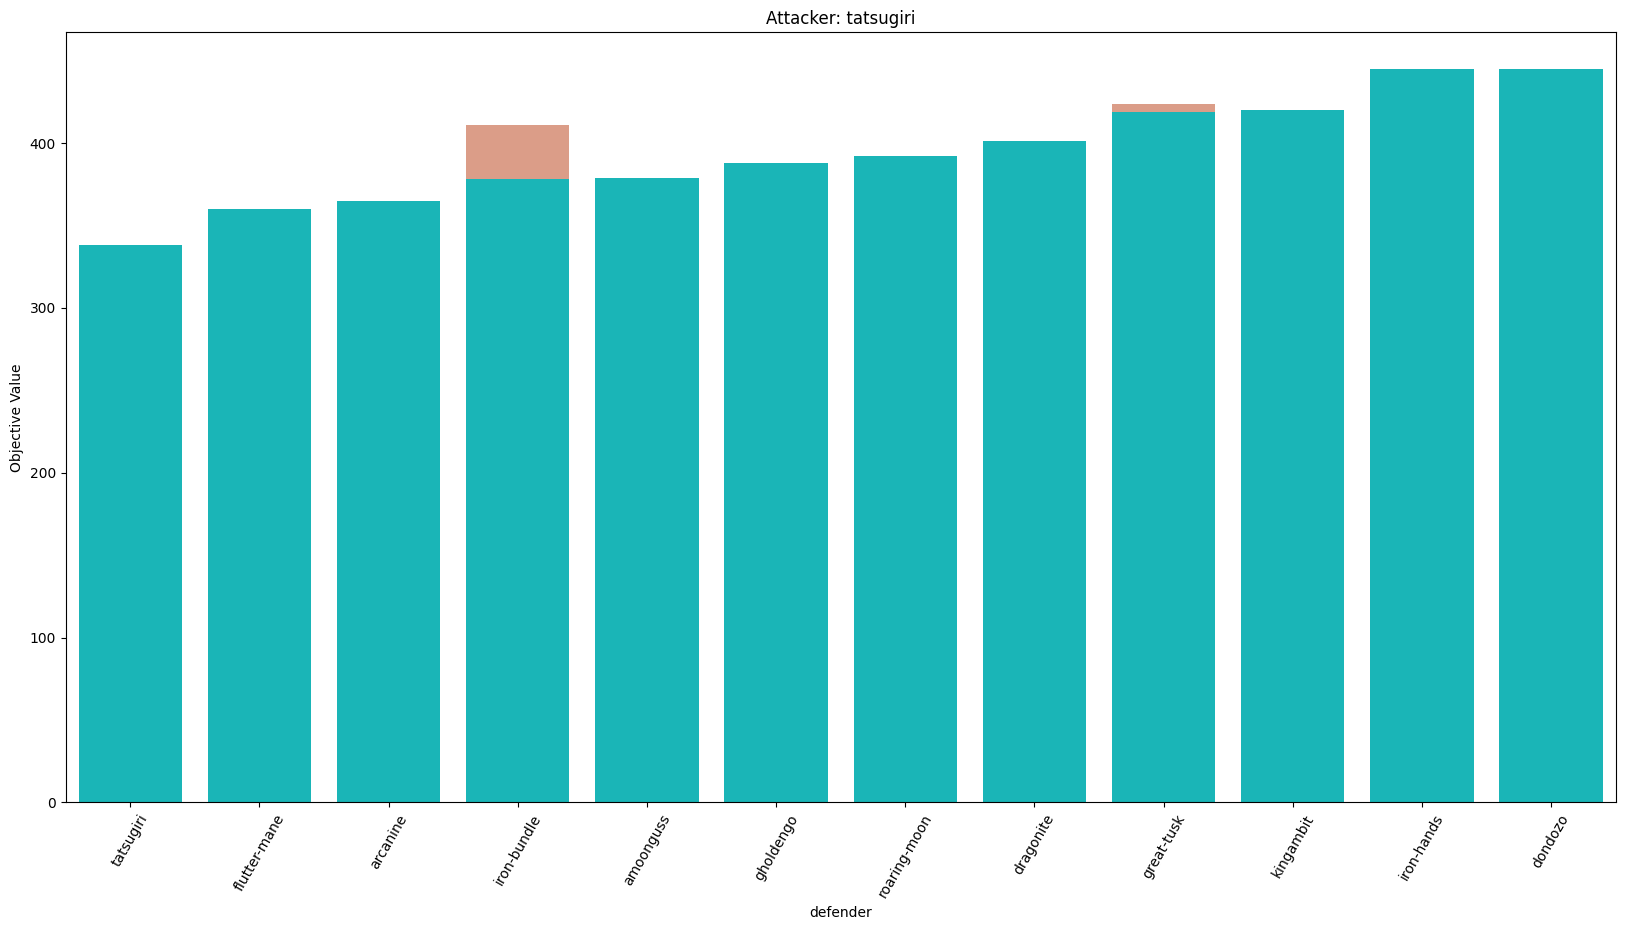

In [10]:
bar_plot_by_attacker('tatsugiri', df_basic, save_path='')

In [11]:
import matplotlib.ticker as ticker


In [12]:
df_generated['b4']

0          5000
1          5000
2          5000
3          5000
4          5000
          ...  
184795    15900
184796    15900
184797    15900
184798    15900
184799    15900
Name: b4, Length: 184800, dtype: int64

In [13]:
len(df_generated[(df_generated['b4']<15000) & (df_generated['b4'] % 1000 == 0)])

16800

In [17]:
def scatter_plot_by_defender(defender, df, df_gen, attacker_subset, save_path=''):
    colors = ['skyblue', 'pink', 'sienna', 'darkblue', 'burlywood', 'grey', 'black','red', 'lime', 'orange', 'plum', 'aqua', ]
    fig, axes = plt.subplots(1,3, figsize=(20, 10))
    df = df[df['attacker'].isin(attacker_subset)& (df['defender'] == defender)].assign(objective=df.objective_val)
    df_gen = df_gen.assign(objective=df_gen.objective_val)

    # add example attackers to subplots
    sns.pointplot(data=df, hue='attacker', x='b4', y='b5', ax=axes[0])
    sns.pointplot(data=df, hue='attacker', x='b4', y='objective_val', ax=axes[1])
    sns.pointplot(data=df, hue='attacker', x='b5', y='objective_val', ax=axes[2])
    
    errorbar_fun = lambda x: (x.min(), x.max())
    sns.pointplot(data=df_gen[(df_gen['b4']<15000) & (df_gen['b4'] % 1000 == 0)], 
                  x='b4', y='objective', errorbar=errorbar_fun, ax=axes[1], capsize=0.1)
    sns.pointplot(data=df_gen[(df_gen['b5']<15000) & (df_gen['b5'] % 1000 == 0)], 
                  x='b5', y='objective', errorbar=errorbar_fun, ax=axes[2])
#     for ind, label in enumerate(axes[1].get_xticklabels()):
#         if ind % 10 == 0:  # every 10th label is kept
#             label.set_visible(True)
#         else:
#             label.set_visible(False)
#     for ind, label in enumerate(axes[2].get_xticklabels()):
#         if ind % 10 == 0:  # every 10th label is kept
#             label.set_visible(True)
#         else:
#             label.set_visible(False)

#     subset data to get upper and lower objective values
#     df_gen = df_gen.sort_values(by=['objective'], ascending=True)
#     df_gen_b4_lower = df_gen.drop_duplicates(subset=['b4'], keep='first', inplace=False)
#     df_gen_b4_upper = df_gen.drop_duplicates(subset=['b4'], keep='last', inplace=False)
#     df_gen_b5_lower = df_gen.drop_duplicates(subset=['b5'], keep='first', inplace=False)
#     df_gen_b5_upper = df_gen.drop_duplicates(subset=['b5'], keep='last', inplace=False)

    # plot ranges for objective values
#     sns.scatterplot(data=df_gen_b4_lower, x='b4', y='objective', ax=axes[1], color='blue')
#     sns.scatterplot(data=df_gen_b4_upper, x='b4', y='objective', ax=axes[1], color='blue')
#     sns.scatterplot(data=df_gen_b5_lower, x='b5', y='objective', ax=axes[2], color='blue')
#     sns.scatterplot(data=df_gen_b5_upper, x='b5', y='objective', ax=axes[2], color='blue')
#     axes[0].set_xticks([5000, 7000, 9000, 11000, 13000, 15000], labels=[5000, 7000, 9000, 11000, 13000, 15000])
#     axes[0].set_yticks([9000, 11000, 13000, 15000, 17000, 19000, 21000], labels=[9000, 11000, 13000, 15000, 17000, 19000, 21000])
#     axes[0].margins(x=0)

    # add figure level legend and remove legends from subplots
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', markerscale=2)
    [ax.legend().remove() for ax in axes]
    [ax.tick_params(axis='x', labelrotation = 45) for ax in axes]


    plt.xticks(rotation = 45)
    fig.suptitle(f'Defender: {defender}')
    plt.rcParams.update({'font.size': 15})
    fig.tight_layout()
    
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'scatter_plot_defender_{defender}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')
        
    plt.show()

In [18]:
df_generated['b4'].describe()

count    184800.000000
mean      10450.000000
std        3175.303853
min        5000.000000
25%        7700.000000
50%       10450.000000
75%       13200.000000
max       15900.000000
Name: b4, dtype: float64

fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/scatter_plot_defender_flutter-mane.png


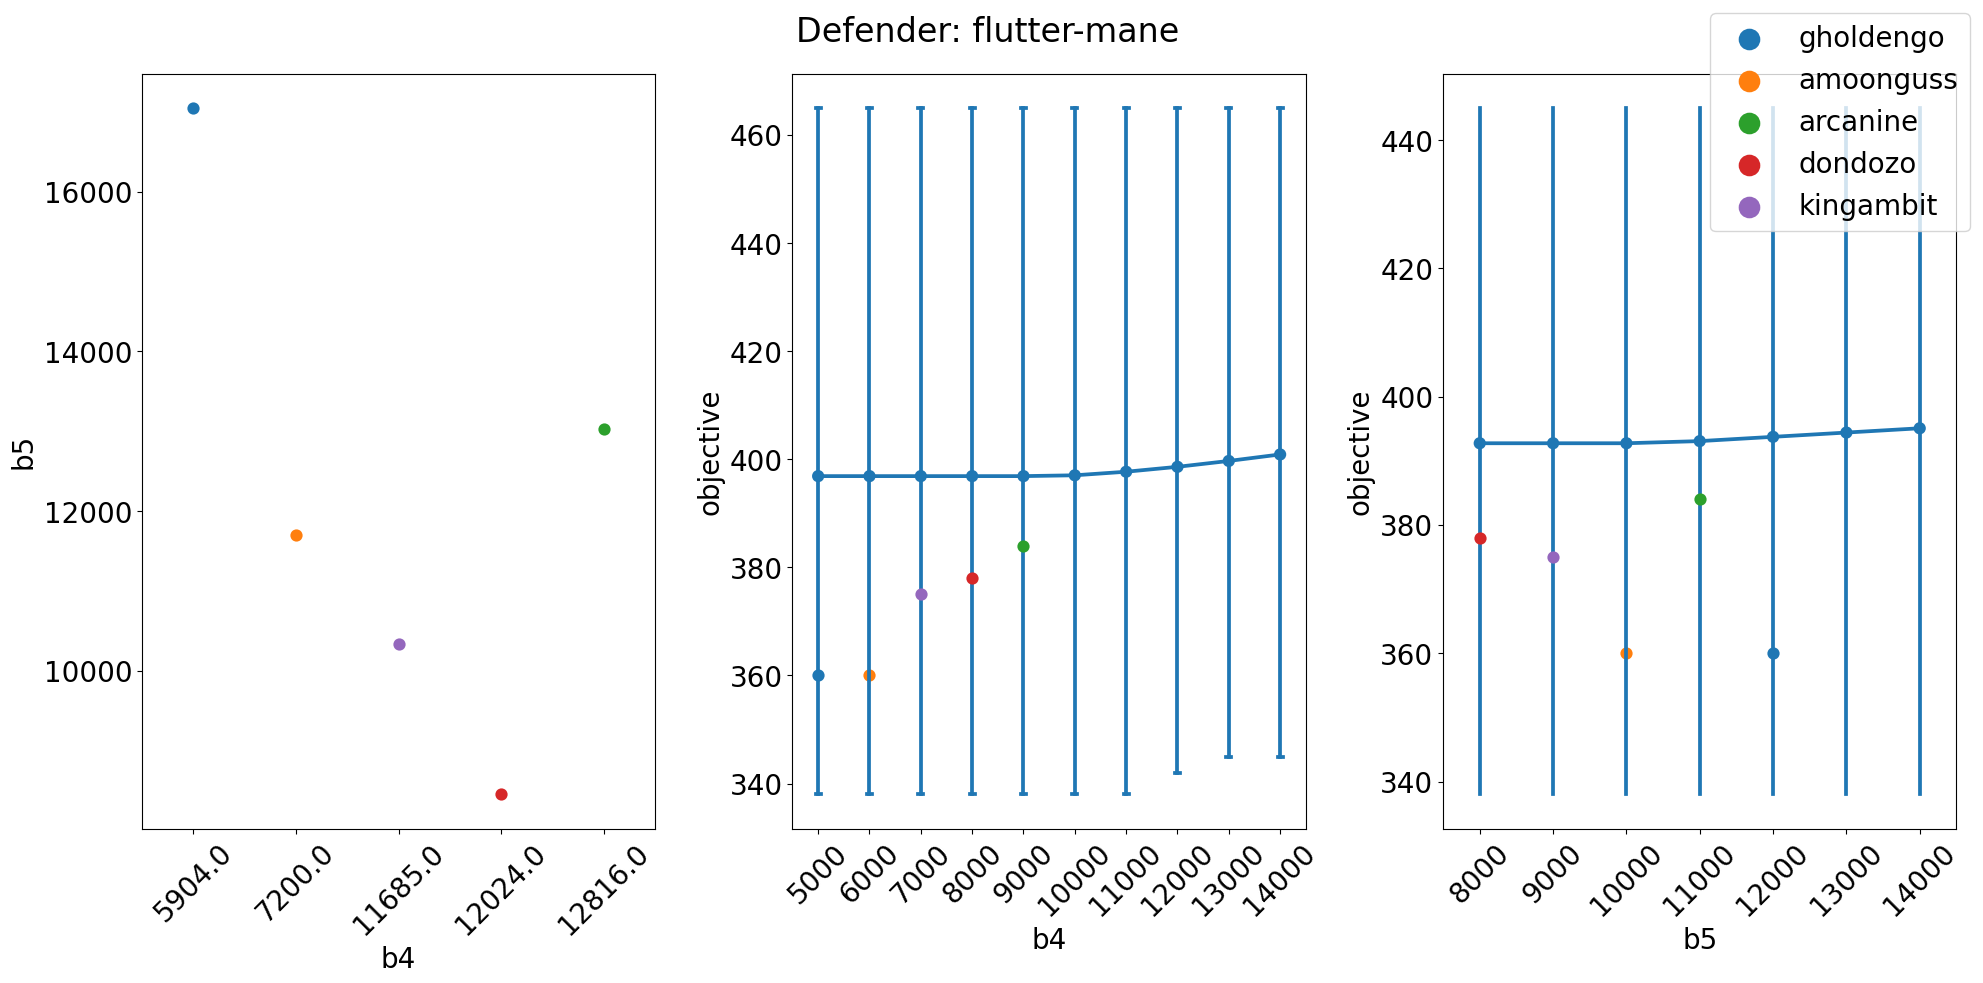

In [19]:
attacker_subset = ['gholdengo', 'arcanine', 'dondozo', 'amoonguss', 'kingambit']
scatter_plot_by_defender('flutter-mane', df_basic, df_generated, attacker_subset, save_path='')

In [277]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)


In [278]:
X

array([[-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       ...,
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975],
       [-3.   , -2.975, -2.95 , ...,  2.925,  2.95 ,  2.975]])

In [79]:
df_generated[(df_generated['b4']<15000)]['b4']

7000      10000
7001      10000
7002      10000
7003      10000
7004      10000
          ...  
176535    10000
176536    10000
176537    10000
176538    10000
176539    10000
Name: b4, Length: 1680, dtype: int64

In [166]:
B5[i,j]

8000

In [169]:
df_gen[(df_gen['b4']==B4[i,j])]

index  is_infeasible  objective_val                     x  \
1   4370          False          360.0  [130.0, 75.0, 155.0]   

                              b   attacker      defender   b1   b2   b3    b4  \
1  [162, 107, 187, 8100, 11000]  generated  flutter-mane  162  107  187  8100   

      b5     x1    x2     x3  objective  
1  11000  130.0  75.0  155.0      360.0

In [225]:
def contour_plot_by_defender(defender, df, df_gen, attacker_subset, save_path=''):

    fig, ax = plt.subplots(figsize=(20, 10))
    df = df[df['attacker'].isin(attacker_subset)& (df['defender'] == defender)].assign(objective=df.objective_val)
    df_gen = df_gen.assign(objective=df_gen.objective_val).copy()
    df_gen = df_gen[(df_gen['defender']==defender)]

#     add example attackers to subplots
#     sns.pointplot(data=df, hue='attacker', x='b4', y='b5', ax=ax)


    # contour plots
    B4, B5 = np.meshgrid(df_gen['b4'], df_gen['b5'])
    print('creating Z for contours')
    Z = np.empty(shape=B4.shape)
    for i in tqdm(range(B4.shape[0])):
        for j in range(B4.shape[1]):
            Z[i,j] = df_gen[(df_gen['b4']==B4[i,j]) & (df_gen['b5']==B5[i,j])].iloc[0]['objective_val']
    CS = ax.contour(B4, B5, Z)
    ax.clabel(CS, inline=True, fontsize=20)

    #     ax.set_title('Simplest default with labels')

    # add figure level legend and remove legends from subplots
    #     handles, labels = axes[0].get_legend_handles_labels()
    #     fig.legend(handles, labels, loc='upper right', markerscale=2)
    #     [ax.legend().remove() for ax in axes]
    #     [ax.tick_params(axis='x', labelrotation = 45) for ax in axes]


    plt.xticks(rotation = 45)
    plt.xlabel('b4')
    plt.ylabel('b5')
    fig.suptitle(f'Objective Value Contours for Defender: {defender}')
    plt.rcParams.update({'font.size': 20})
    fig.tight_layout()

    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'contour_plot_defender_{defender}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')

    plt.show()

In [226]:
# get subset of df_generated
df_gen_subset = df_generated[(df_generated['b4']<15000) & 
                             (df_generated['b4']>=8000) & 
                             (df_generated['b5']<15000) & 
                             (df_generated['b5']>=8000) &
                             (df_generated['b4'] % 300 == 0) &
                             (df_generated['b5'] % 300 == 0)].copy().reset_index()
len(df_gen_subset)

6348

creating Z for contours


100%|██████████| 529/529 [00:53<00:00,  9.95it/s]


fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/contour_plot_defender_flutter-mane.png


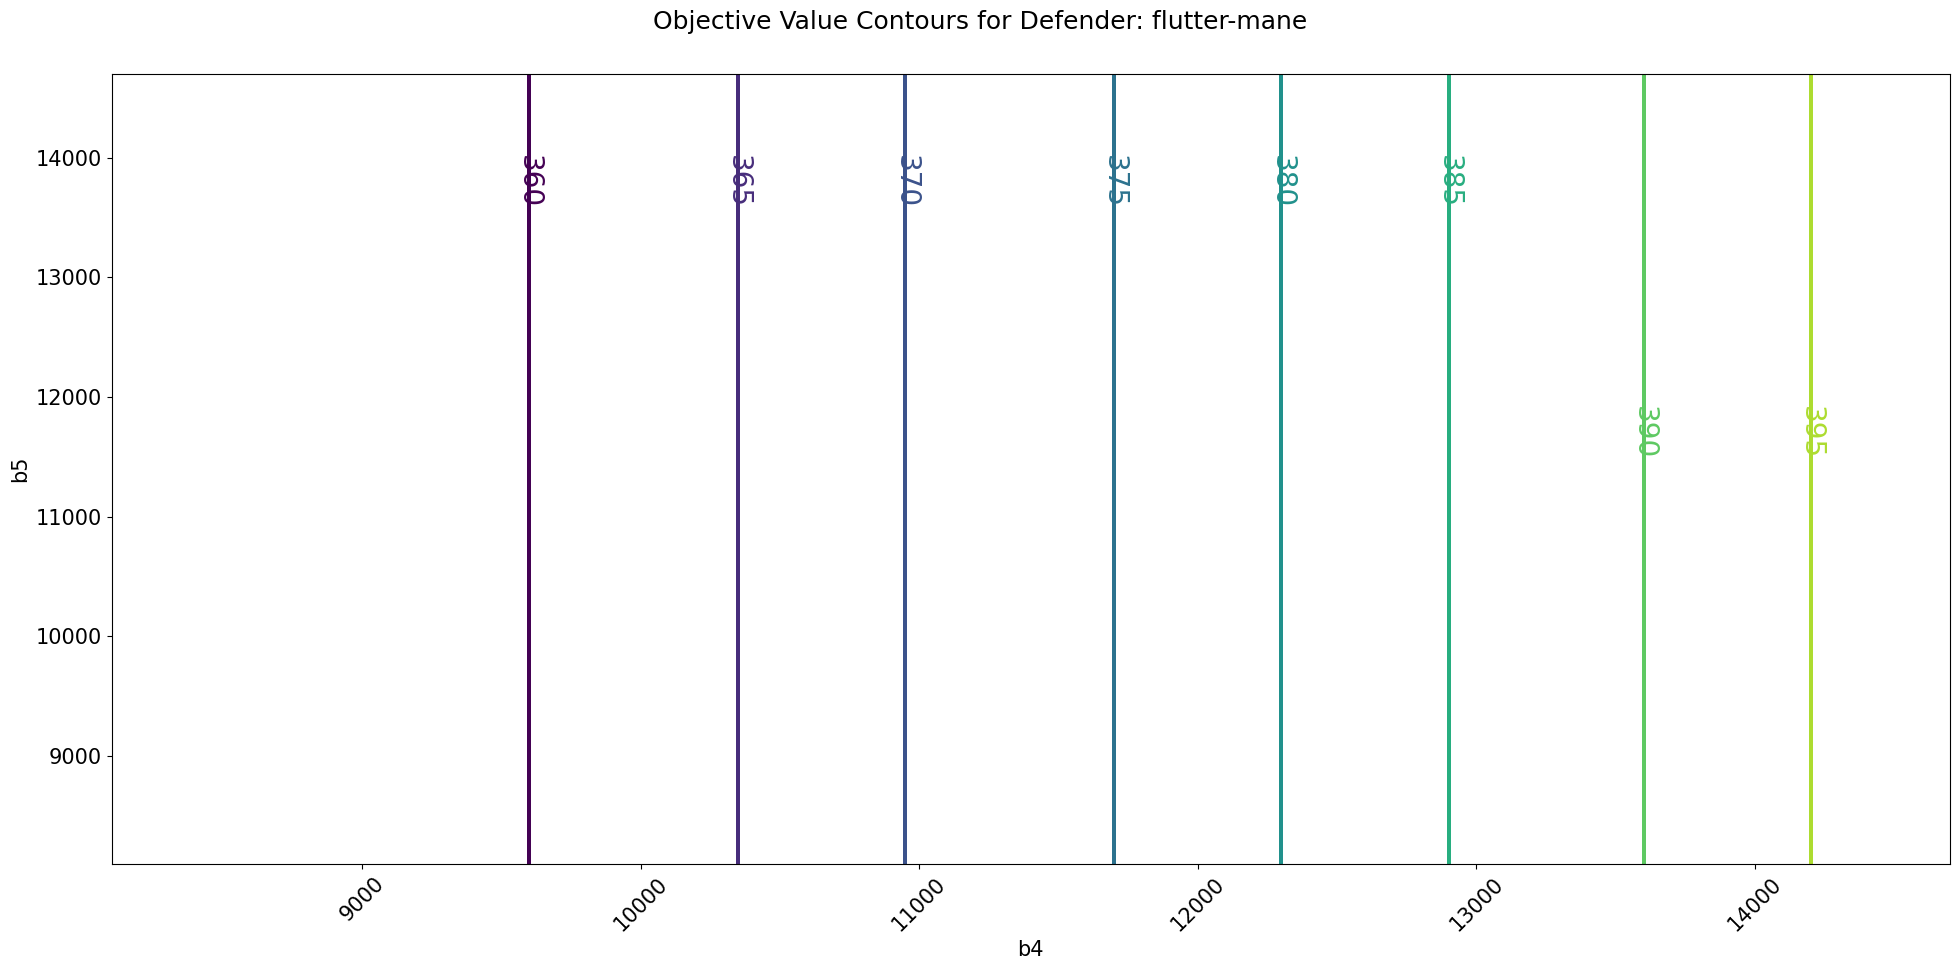

In [227]:
contour_plot_by_defender('flutter-mane', df_basic, df_gen_subset, attacker_subset, save_path='')

In [232]:
def contour_image_plot_by_defender(defender, df, df_gen, attacker_subset, save_path=''):
    x = df_gen['b4']
    y = df_gen['b5']
    z = df_gen['objective_val']

    offset = .25
    xmin = x.min()-offset
    xmax = x.max()+offset
    ymin = y.min()-offset
    ymax = y.max()+offset

    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = sps.gaussian_kde(values, weights=z)
    Z = np.reshape(kernel(positions).T, X.shape)

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
              extent=[xmin, xmax, ymin, ymax],
              aspect='auto'
             )
    sns.scatterplot(
        data=df_basic[df_basic['attacker'].isin(attacker_subset)& (df['defender'] == defender)],
        x='b4', y='b5', sizes=(10, 200),
        hue='attacker',
        legend='auto'
    )
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    
    fig.suptitle(f'Objective Value Contours for Defender: {defender}')
    plt.rcParams.update({'font.size': 10})    
    plt.xticks(rotation = 45)


    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'contour_image_plot_defender_{defender}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')

    plt.show()

fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/contour_image_plot_defender_flutter-mane.png


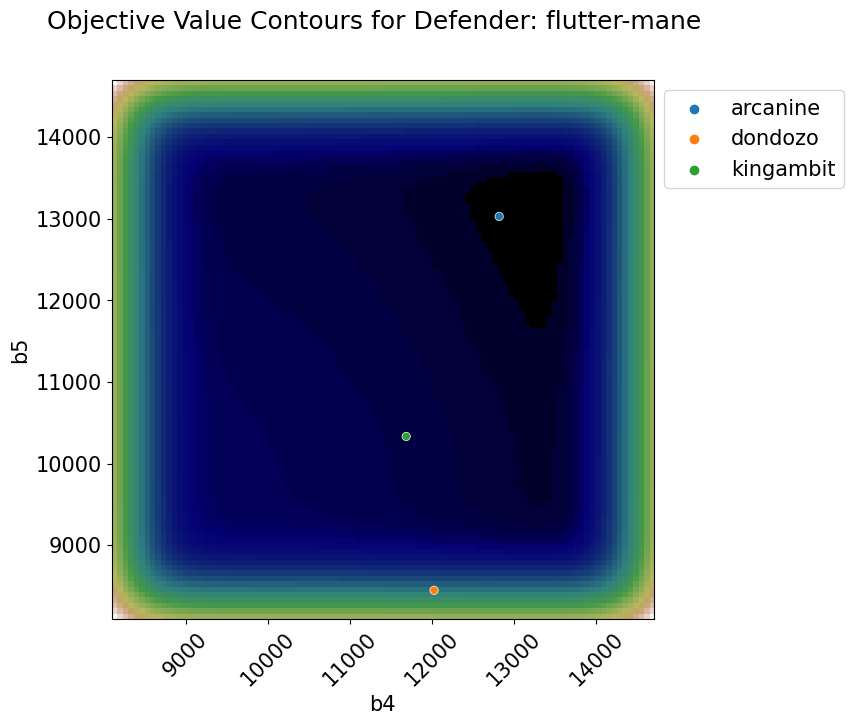

In [233]:
contour_image_plot_by_defender('flutter-mane', df_basic, df_gen_subset, ['arcanine', 'dondozo', 'kingambit'], save_path='')

In [245]:
# def interactive_3d_plot_by_defender()
# Import dependencies
import plotly.express as px

df = df_basic.copy()
defender='flutter-mane'

df = df[df['attacker'].isin(attacker_subset)& (df['defender'] == defender)].assign(objective=df.objective_val)
# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
# trace = go.Scatter3d(
#     x=df['b4'], 
#     y=df['b5'], 
#     z=df['objective'],
#     color=df['attacker'],
#     mode='markers',
#     marker={
#         'size': 10,
#         'opacity': 0.8,
#     }
# )

fig = px.scatter_3d(df, x='b4', y='b5', z='objective',
              color='attacker')

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    scene = dict(
                    xaxis_title='B4',
                    yaxis_title='B5',
                    zaxis_title='Objective Value'),
    
)

# data = [trace]

# plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
fig.show()
# plotly.offline.iplot(plot_figure)

In [246]:
print("proportion of problems that are infeasible: " + str(df_basic['is_infeasible'].mean()))

proportion of problems that are infeasible: 0.006944444444444444


Todo:
- fake error bars: max and min as vertical line through circle average
- try contours for cross sections/level sets
- try rotating plots
- maybe: plot closed form function
- maybe: plot strategy as "survive all, all but one"
- maybe: lines on plot for "all but one"

In [29]:
# df['scaled_objective_val'] = scaler.fit_transform(df['objective_val'].values.reshape(-1,1))

In [33]:
df = df_basic.copy()
attacker = 'flutter-mane'

In [274]:
# %matplotlib inline
def graph_plot_by_attacker(attacker, df, save_path=''):
    df = df.copy()
    scaler = MinMaxScaler()
    df['scaled_objective_val'] = scaler.fit_transform(df['objective_val'].values.reshape(-1,1))
    G = nx.Graph()
    df = df[df['attacker']==attacker]
    for i,r in df.iterrows():
        G.add_edge(r['attacker'],r['defender'],weight=r['scaled_objective_val']*10)

    plt.figure(3,figsize=(8,8))
    plt.title(f'Objective Graph Contours for Attacker: {defender}')

#     pos = nx.circular_layout(G,  scale=.1)
    pos = nx.spring_layout(G,  k=0.3, iterations=10)
    nx.draw_networkx(G, pos, node_size=5000, cmap=plt.get_cmap('Pastel1_r'), node_color=range(len(G.nodes)))

    for edge in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
        
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'graph_plot_attacker_{attacker}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')

    plt.show()

fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/graph_plot_attacker_flutter-mane.png


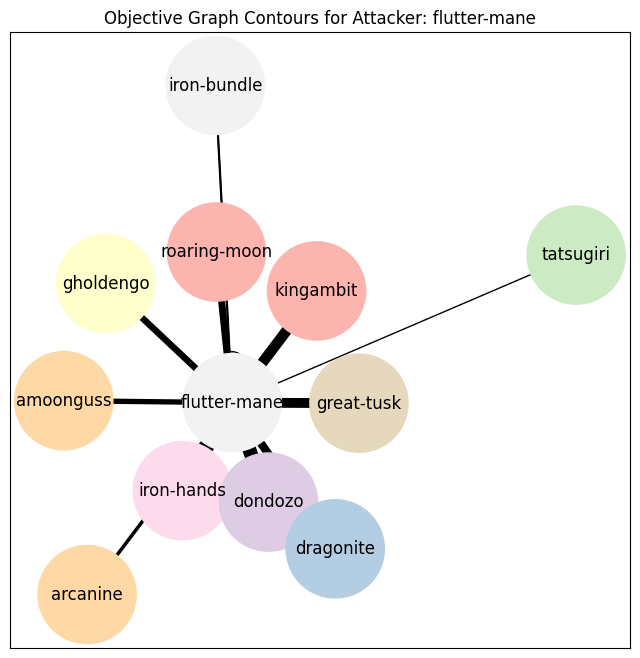

In [275]:
graph_plot_by_attacker('flutter-mane', df_basic, save_path='')

In [315]:
# %matplotlib inline
def graph_plot_by_threshold(threshold, attacker_subset, df, save_path=''):
    df = df.copy()
    scaler = MinMaxScaler()
    df['scaled_objective_val'] = scaler.fit_transform(df['objective_val'].values.reshape(-1,1))
    df["objective_val_lb"] = df.apply(lambda row: ((row["b1"] + row["b2"] + row["b3"] - 32)), axis = 1)

    G = nx.Graph()
#     df = df[df['attacker'].isin(attacker_subset)]
    for i,r in df.iterrows():
        if r['objective_val'] < r['objective_val_lb']:
            G.add_edge(r['attacker'],r['defender'],weight=r['scaled_objective_val']*10)
        else:
            print(f'no edge: {r["attacker"]} to {r["defender"]}')
    G.remove_edges_from(nx.selfloop_edges(G))
    plt.figure(3,figsize=(12,12)) 

#     pos = nx.circular_layout(G,  scale=.1)
    pos = nx.spring_layout(G,  scale=.1)
    nx.draw_networkx(G, pos, node_size=5000, cmap=plt.get_cmap('Pastel1_r'), node_color=range(len(G.nodes)))

    for edge in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2],arrows=True, arrowsize=10, arrowstyle='->', node_size=5000)
    
    try:
        save_path = save_path if save_path else os.path.join(FIG_DIR,f'graph_plot_threshold_{int(threshold)}.png')
        plt.savefig(save_path, bbox_inches='tight')
        print(f'fig saved to {save_path}')
    except:
        print('fig not saved')

    plt.show()

In [316]:
attacker_subset = ['gholdengo', 'arcanine', 'dondozo', 'amoonguss', 'kingambit']
threshold = (.99) * df_basic['objective_val'].max()
print('threshold: ', threshold)

threshold:  440.55


no edge: iron-hands to flutter-mane
fig saved to /Users/hailey/Dropbox/Apps/Overleaf/convex_optimization_project/figures/graph_plot_threshold_440.png


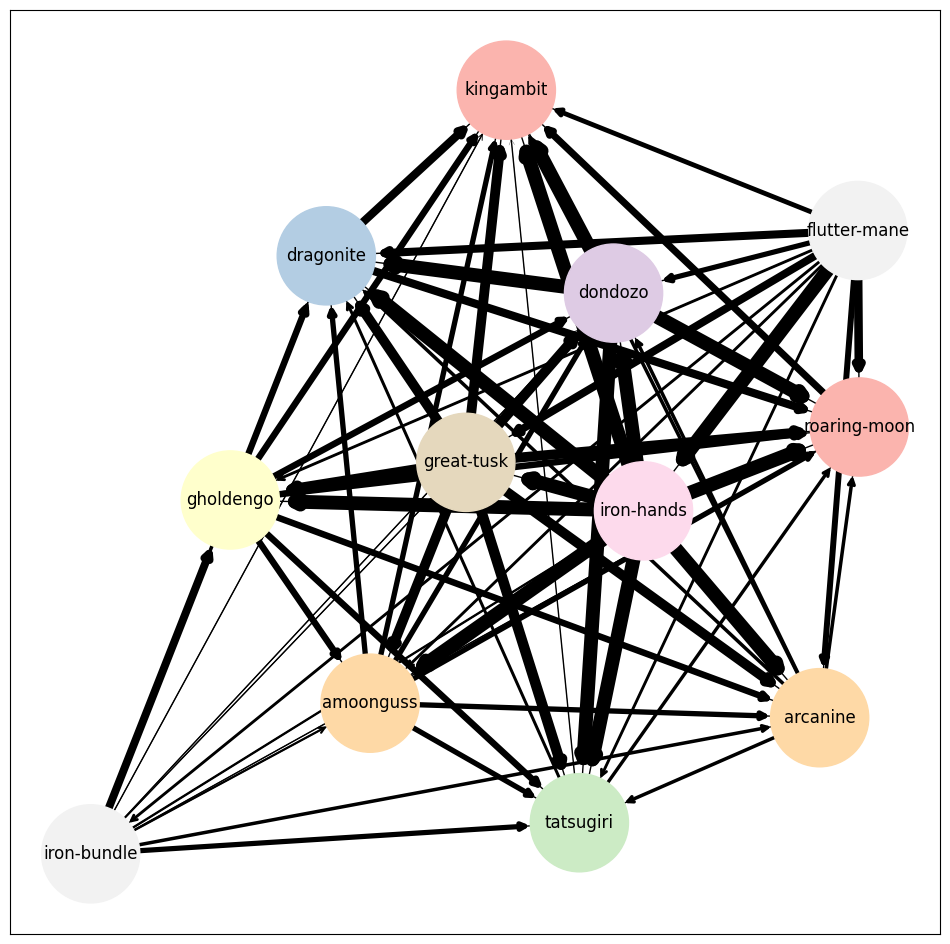

In [317]:
graph_plot_by_threshold(threshold, attacker_subset, df_basic, save_path='')

Todo: directed graph